<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

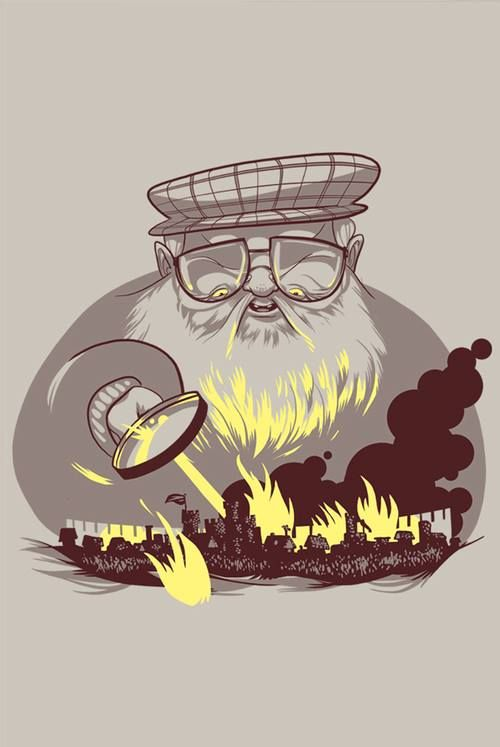

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [163]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

zsh:1: command not found: gdown


zsh:1: command not found: gdown


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [165]:
data = pd.read_csv('../data/game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Выведем процентное соотношение пропущенных значений к общему числу наблюдений.

In [167]:
data.isna().sum(axis=0) / data.shape[0]

name                0.000000
title               0.539499
male                0.000000
culture             0.686577
dateOfBirth         0.820809
mother              0.988439
father              0.985870
heir                0.986513
house               0.244701
spouse              0.871548
book1               0.000000
book2               0.000000
book3               0.000000
book4               0.000000
book5               0.000000
isAliveMother       0.988439
isAliveFather       0.985870
isAliveHeir         0.986513
isAliveSpouse       0.871548
isMarried           0.000000
isNoble             0.000000
age                 0.820809
numDeadRelations    0.000000
popularity          0.000000
isAlive             0.000000
dtype: float64

<Axes: xlabel='S.No'>

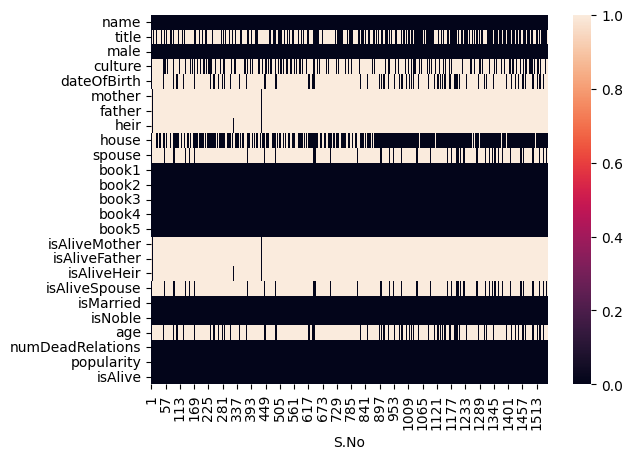

In [168]:
sns.heatmap(data.isna().transpose())

Видим, что в столбцах `mother`, `father`, `heir`, `spouse`, `isAliveMother`, `isAliveFather`, `isAliveHeir`, `isAliveSpouse` более 80% NaN. Так же эти столбцы могут привести к Dataleaks, т. к. по ним можно определить умерших персонажей. Поэтому удалим их.

In [169]:
data.drop(columns=['mother', 'father', 'heir', 'spouse', \
                   'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

Так же столбцы `dateOfBirth` и `age` дублируют друг друга сообщая о возрасте персонажа. Посмотрим как распределяются значения в этих столбцах.

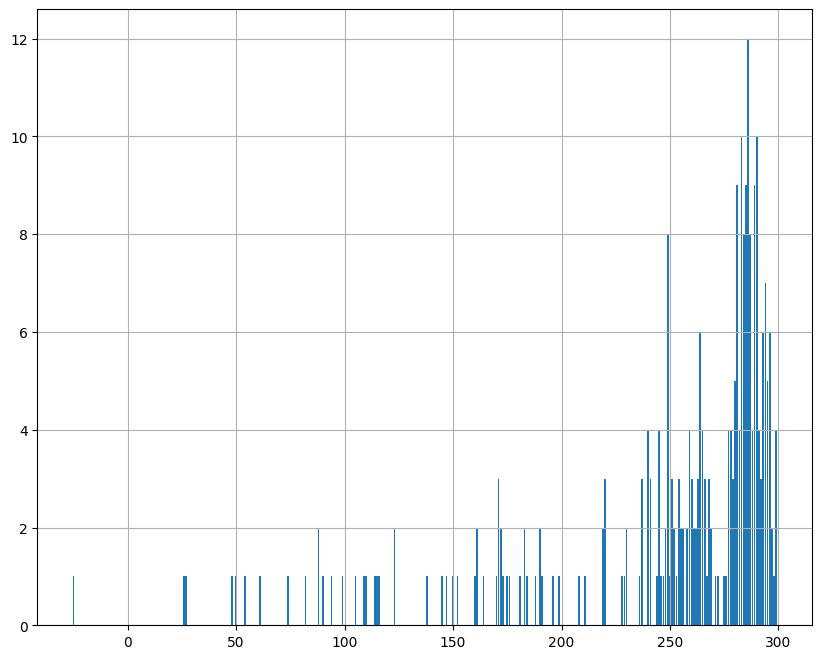

In [170]:
age_col = data['dateOfBirth'].value_counts()
plt.figure(figsize=(10, 8))
plt.bar(age_col.index, age_col.values)
plt.grid()
plt.show()

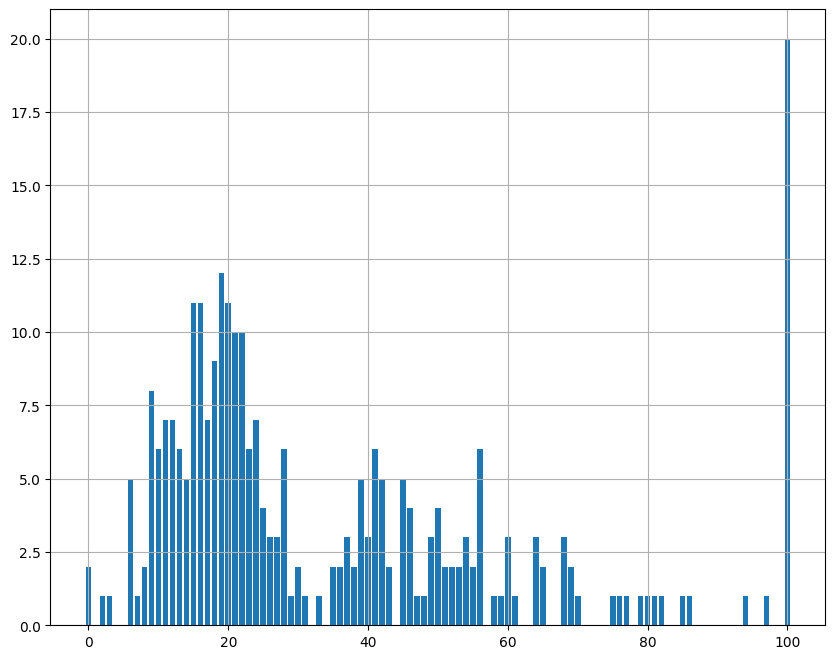

In [171]:
age_col = data['age'].value_counts()
plt.figure(figsize=(10, 8))
plt.bar(age_col.index, age_col.values)
plt.grid()
plt.show()

In [172]:
data.drop(columns='age', inplace=True)

In [173]:
data.drop(columns='dateOfBirth', inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [174]:
isPopular = data['popularity']
isPopular = (isPopular > 0.5).astype(int)
data['isPopular'] = isPopular

In [175]:
boolDeadRelations = data['numDeadRelations']
boolDeadRelations = (boolDeadRelations > 0).astype(int)
data['boolDeadRelations'] = boolDeadRelations

Удалим столбцы `popularity` и `numDeadRelations`

In [176]:
data.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1557 non-null   object
 1   title              717 non-null    object
 2   male               1557 non-null   int64 
 3   culture            488 non-null    object
 4   house              1176 non-null   object
 5   book1              1557 non-null   int64 
 6   book2              1557 non-null   int64 
 7   book3              1557 non-null   int64 
 8   book4              1557 non-null   int64 
 9   book5              1557 non-null   int64 
 10  isMarried          1557 non-null   int64 
 11  isNoble            1557 non-null   int64 
 12  isAlive            1557 non-null   int64 
 13  isPopular          1557 non-null   int64 
 14  boolDeadRelations  1557 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 226.9+ KB


In [178]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [179]:
def replace_cult(culture):
    for k, v in cult.items():
        if str(culture).lower() in v:
            return k
    return culture
# data.loc[data.culture.str.lower().isin(cult.values()) , 'culture'] = data.culture.str.lower().apply(lambda x: cult.get(x))
data['culture'] = data['culture'].apply(replace_cult)

Объединим культуры, количество которых меньше 3-х и назовём их `Other`

In [180]:
cult_numb = data['culture'].value_counts().to_dict()

def replace_small_num(feature, num_of_unique_values):
    for k, v in num_of_unique_values.items():
        if num_of_unique_values[str(feature)] < 3:
            return 'Other'
    return feature

data['culture'] = data['culture'].dropna().apply(replace_small_num, args=(cult_numb,))

# data['culture'].value_counts()

In [181]:
data['culture'] = data['culture'].fillna('Unknown')
data['title'] = data['title'].fillna('Unknown')
data['house'] = data['house'].fillna('Unknown')

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Столбец `name` можно удалить, т.к. это индивидуальный признак.

In [182]:
data.drop(columns=['name'], inplace=True)

Проанализируем столбец `title`.

In [183]:
title_set = set(data['title'])
# title_set

Видим, что некоторые титулы являются частными случаями других более общих. Объединим их.

In [184]:
prevalence_title = ['Lord', 'Master', 'Prince', 'Lady', 'King', 'Knight', 'Captain', 'Commander']

In [185]:
def title_reduction(title):
    new_title = []
    new_title = [element.lower() for element in title if element in prevalence_title]
    if not new_title:
        new_title = title
    
    return ' '.join(map(str, new_title))
    
data['title'] = data['title'].str.split(' ').apply(title_reduction)

# data['house'].value_counts().to_dict()

Объединим титулы, количество которых меньше 3-х, и назовём их `other`.

In [186]:
title_num = data['title'].value_counts().to_dict()

data['title'] = data['title'].apply(replace_small_num, args=(title_num,))

# data['title'].value_counts()

In [187]:
data['house'].value_counts().to_dict()

{'Unknown': 381,
 'House Frey': 89,
 "Night's Watch": 88,
 'House Stark': 56,
 'House Targaryen': 40,
 'House Lannister': 36,
 'House Tyrell': 33,
 'House Greyjoy': 30,
 'House Osgrey': 20,
 'Faith of the Seven': 15,
 'House Botley': 12,
 'House Hightower': 12,
 'House Martell': 11,
 'House Arryn': 11,
 'House Florent': 10,
 'House Crakehall': 10,
 'House Bracken': 9,
 'House Waynwood': 9,
 'House Brax': 8,
 'Stone Crows': 8,
 'House Wylde': 8,
 'House Tully': 8,
 'House Westerling': 8,
 'House Velaryon': 8,
 'House Whent': 7,
 'House Seaworth': 7,
 'House Paege': 7,
 'House Plumm': 7,
 'House Swyft': 7,
 'House Swann': 6,
 'House Baratheon': 6,
 'House Redwyne': 6,
 'House Baelish': 6,
 'House Beesbury': 6,
 'House Baratheon of Dragonstone': 6,
 'House Bolton': 6,
 'House of Loraq': 6,
 'House Tallhart': 6,
 'House Drumm': 6,
 'House Haigh': 6,
 'House Estermont': 6,
 'House Vance of Atranta': 5,
 'House Ashford': 5,
 'House Hollard': 5,
 'House Umber': 5,
 'House Royce': 5,
 'Kingsgu

In [188]:
house_num = data['house'].value_counts().to_dict()

data['house'] = data['house'].apply(replace_small_num, args=(house_num,))

data['house'].value_counts().to_dict()

{'Unknown': 381,
 'Other': 254,
 'House Frey': 89,
 "Night's Watch": 88,
 'House Stark': 56,
 'House Targaryen': 40,
 'House Lannister': 36,
 'House Tyrell': 33,
 'House Greyjoy': 30,
 'House Osgrey': 20,
 'Faith of the Seven': 15,
 'House Hightower': 12,
 'House Botley': 12,
 'House Arryn': 11,
 'House Martell': 11,
 'House Crakehall': 10,
 'House Florent': 10,
 'House Bracken': 9,
 'House Waynwood': 9,
 'House Velaryon': 8,
 'Stone Crows': 8,
 'House Westerling': 8,
 'House Tully': 8,
 'House Wylde': 8,
 'House Brax': 8,
 'House Swyft': 7,
 'House Paege': 7,
 'House Whent': 7,
 'House Seaworth': 7,
 'House Plumm': 7,
 'House Drumm': 6,
 'House Tallhart': 6,
 'House of Loraq': 6,
 'House Bolton': 6,
 'House Baelish': 6,
 'House Haigh': 6,
 'House Baratheon': 6,
 'House Swann': 6,
 'House Estermont': 6,
 'House Redwyne': 6,
 'House Beesbury': 6,
 'House Baratheon of Dragonstone': 6,
 'House Karstark': 5,
 'House Webber': 5,
 'House Hollard': 5,
 'Second Sons': 5,
 'House Ashford': 5,
 

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              1557 non-null   object
 1   male               1557 non-null   int64 
 2   culture            1557 non-null   object
 3   house              1557 non-null   object
 4   book1              1557 non-null   int64 
 5   book2              1557 non-null   int64 
 6   book3              1557 non-null   int64 
 7   book4              1557 non-null   int64 
 8   book5              1557 non-null   int64 
 9   isMarried          1557 non-null   int64 
 10  isNoble            1557 non-null   int64 
 11  isAlive            1557 non-null   int64 
 12  isPopular          1557 non-null   int64 
 13  boolDeadRelations  1557 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 214.8+ KB


In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
label_encoder = LabelEncoder()
data['culture'] = label_encoder.fit_transform(data['culture'])
data['title'] = label_encoder.fit_transform(data['title'])
data['house'] = label_encoder.fit_transform(data['house'])

<Axes: >

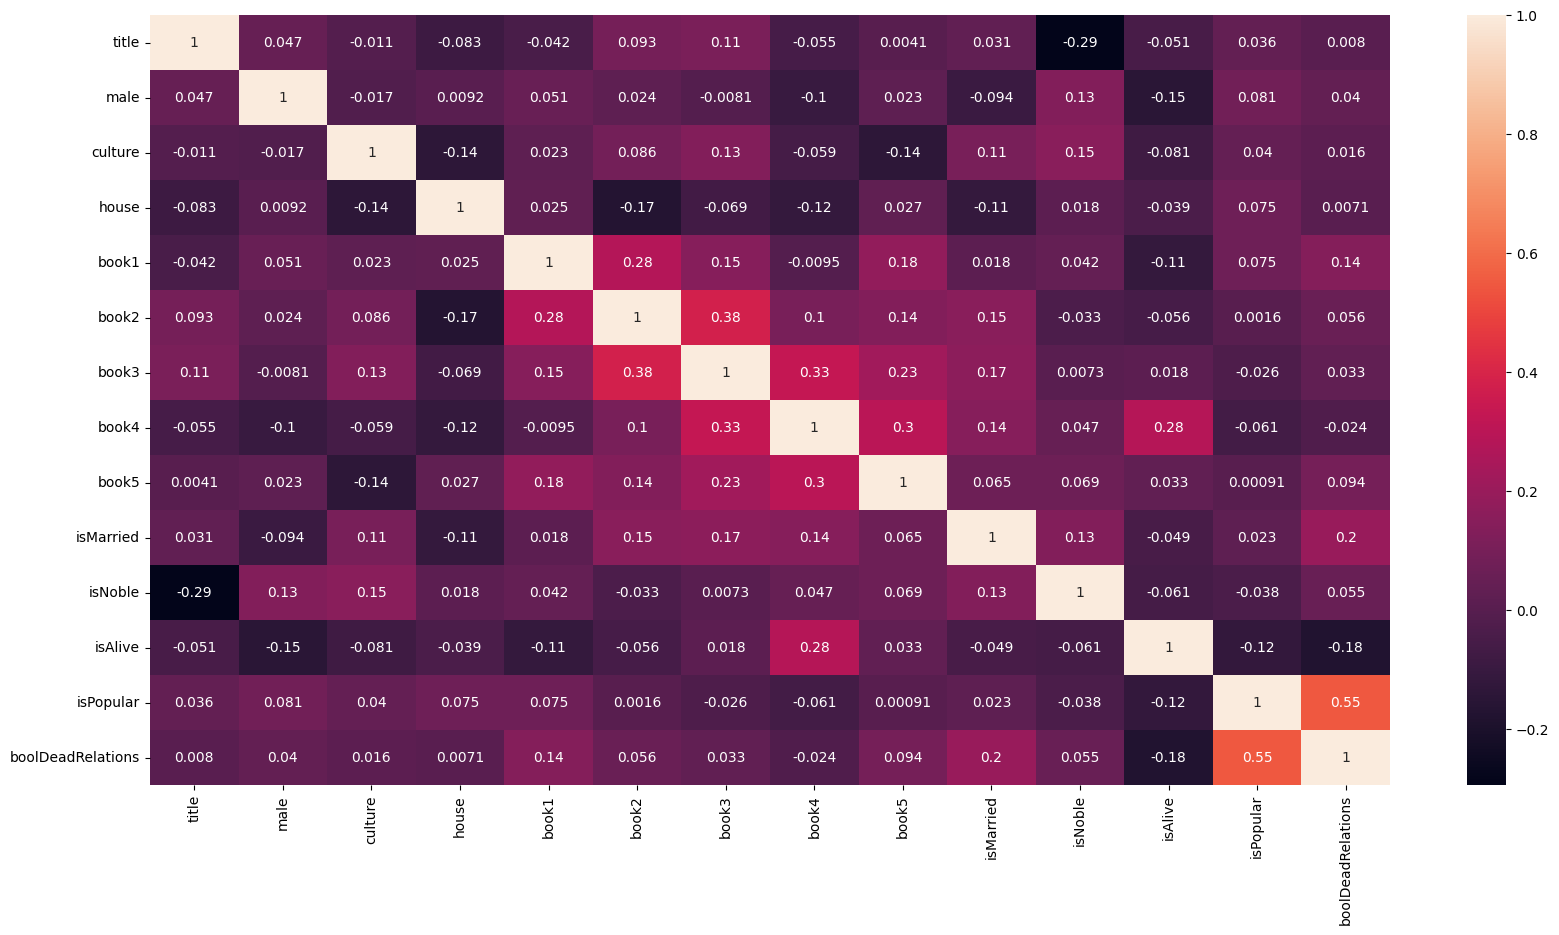

In [192]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Проанализаруем целевую переменную.

In [194]:
data['isAlive'].value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

Целевая пеерменная - категориальная.

In [196]:
data['isAlive'].value_counts(normalize=True) * 100

isAlive
1    77.842004
0    22.157996
Name: proportion, dtype: float64

Классы не сбалансированны.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = # ...
y = # ...

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = # ...

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)